<a href="https://colab.research.google.com/github/Anuubhavvvv/Project-Python/blob/main/K_means_driverdata_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Driver data clustering
1) Read the dataset<br>
2) Remove handle null values if any<br>
3) Depict 'Distance_Feature' and 'Speeding_Feature' on a scatter chart.<br> 
4) Based on 'Distance_Feature' and 'Speeding_Feature' cluster the dataset using KMeans<br>
5) Apply K_Means separately with 2,3,4 and 5 clusters. Depict different clusters on a scatter chart with their respective cluster centriods marked.<br>
6) Scale the data using Standard Scaler<br>
7) Determine appropriate number of cluster using Elbow method after data has been scaled<br>
8) Repeat Q5 with appropriate number of cluster obtained from Elbow method after scaling<br>


In [ ]:
import numpy  as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/driverdata.csv')

In [ ]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [ ]:
df.shape


(4000, 3)

In [8]:
df.isnull().sum()

Driver_ID           0
Distance_Feature    0
Speeding_Feature    0
dtype: int64

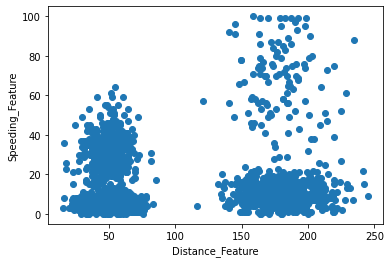

In [10]:
plt.scatter(df['Distance_Feature'],df['Speeding_Feature'])
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()

In [25]:
x=df.iloc[:,1:]

In [13]:
from sklearn.cluster import KMeans

In [18]:
wc=[]
for i in range(1,20):
  cluster=KMeans(n_clusters=i)
  cluster.fit(x)
  wc.append(cluster.inertia_)
print(wc)

[12184626.129627975, 1316420.8509477186, 992634.060670247, 719601.1096991899, 534637.7967931301, 372837.10752638336, 319824.1635640675, 276883.8948169812, 253093.02935866071, 230772.20896939439, 208977.7818573231, 193318.63236928874, 173408.21887367012, 159223.97408906714, 149263.2051099065, 139930.8826876157, 132347.91268341363, 125299.58051161317, 120077.8901571778]


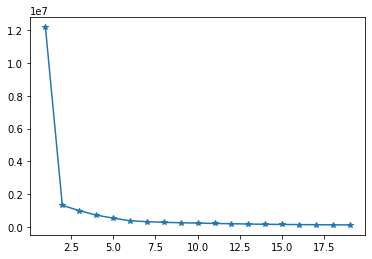

In [20]:
plt.plot(range(1,20),wc,marker='*')

In [28]:
cluster2= KMeans(n_clusters=2)
cluster2.fit(x)
cluster2_pred=cluster2.predict(x)
len(cluster2_pred)


4000

In [30]:
cluster2_pred[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc= StandardScaler()
x_sc=sc.fit_transform(x)
x_sc


array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [33]:
x_sc=pd.DataFrame(x_sc,columns=['Distance_Feature_sc','Speed_Feature_sc'])
x_sc

,Distance_Feature_sc,Speed_Feature_sc
0,-0.089810,1.260613
1,-0.439773,1.041744
2,-0.215131,1.187656
3,-0.380666,0.822875
4,-0.401428,1.041744
...,...,...
3995,1.571155,-0.052602
3996,1.872860,-0.417383
3997,1.774474,0.093311
3998,1.872299,-0.417383
